# WORKING DOC

### Import Libraries and Dependencies

In [22]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [23]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [24]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [25]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['BTC/USD']['symbol']

'BTC/USD'

In [26]:
# Import data as a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_details)

# Display sample data
crypto_df

,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
tierBased,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
taker,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,...,0.0026,0.0026,0.002,0.002,0.0026,0.0026,0.0026,0.0026,0.002,0.0
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.002,0.002,0.0016,0.0016,0.0016,0.0016,0.002,0.0
tiers,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...",...,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000..."
precision,"{'amount': 8, 'price': 2}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 7}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}",...,"{'amount': 8, 'price': 0}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 8}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}"
limits,"{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...",...,"{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
id,AAVEAUD,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAAUD,ADAETH,ADAEUR,ADAGBP,...,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZRXEUR,ZRXGBP,ZRXUSD,ZRXXBT,ZUSDZCAD,ZUSDZJPY
symbol,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,...,YFI,YFI,EUR,GBP,ZRX,ZRX,ZRX,ZRX,USD,USD


### List Available Cryptocurrencies for Trading

In [27]:
# Print column values of DataFrame
# print(type(crypto_df.columns.values))
# print(len(crypto_df.columns.values))
pairs = crypto_df.columns.values
pairs_df = pd.DataFrame(pairs, columns=['pairs'])
pairs_df.shape

(356, 1)

In [28]:
#Create numpy array identifying which pairs contain USDT pairs
usdt_bool_np = pairs_df.pairs.str.contains("/USDT")

# Add USDT numpy array boolean pairs to dataframe
pairs_df['USDT'] = usdt_bool_np

#remove pairs without USDT
pairs_df = pairs_df[pairs_df.USDT != False]

#reset the index, drop extraneous columns
pairs_df = pairs_df.reset_index()
pairs_df = pairs_df.drop(columns=['index', 'USDT'])

pairs_df

,pairs
0,ADA/USDT
1,BCH/USDT
2,DAI/USDT
3,DOT/USDT
4,EOS/USDT
5,ETH/USDT
6,LINK/USDT
7,LTC/USDT
8,USDC/USDT
9,BTC/USDT


### Fetch Historical Data for LINK/USDT

In [29]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1d")
historical_prices[2]

[1602892800000, 10.5, 10.63435, 10.44171, 10.58217, 3157.44352461]

In [ ]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

### Convert Epoch Timestamp to Readable Date Format

In [10]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1602720000000,10.70000,10.77000,10.67489,10.77000,152.510069,2020-10-15
1,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401,2020-10-16
2,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17
3,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18
4,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19


'_________________________'

'historical_prices_df shape: (232, 7)'

In [11]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

,timestamp,open,high,low,close,volume,date
date,,,,,,,
2020-10-15,1602720000000,10.70000,10.77000,10.67489,10.77000,152.510069,2020-10-15
2020-10-16,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401,2020-10-16
2020-10-17,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17
2020-10-18,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18
2020-10-19,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19
...,...,...,...,...,...,...,...
2021-05-30,1622332800000,25.18917,29.10571,23.75893,26.76105,48007.786240,2021-05-30
2021-05-31,1622419200000,26.78231,32.09140,25.64723,32.09140,60506.920034,2021-05-31
2021-06-01,1622505600000,31.91397,32.53629,29.05471,30.70134,41418.194124,2021-06-01


### Plot Daily Returns

In [12]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

,timestamp,open,high,low,close,volume,date,daily_return
date,,,,,,,,
2020-10-16,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401,2020-10-16,-0.011142
2020-10-17,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17,-0.006369
2020-10-18,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18,0.030731
2020-10-19,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19,-0.001328
2020-10-20,1603152000000,10.84422,10.84422,9.81666,9.81666,8063.562627,2020-10-20,-0.098801
...,...,...,...,...,...,...,...,...
2021-05-30,1622332800000,25.18917,29.10571,23.75893,26.76105,48007.786240,2021-05-30,0.055623
2021-05-31,1622419200000,26.78231,32.09140,25.64723,32.09140,60506.920034,2021-05-31,0.199183
2021-06-01,1622505600000,31.91397,32.53629,29.05471,30.70134,41418.194124,2021-06-01,-0.043316


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [13]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
date,,,,,,,,,,,,,,,,,,
2020-10-16,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401,2020-10-16,-0.011142,10.650000,10.650000,10.650000,10.650000,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-17,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17,-0.006369,10.614780,10.615497,10.615850,10.616026,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2020-10-18,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18,0.030731,10.719910,10.716179,10.714373,10.713478,1.0,0.0,1.0,1.0,0.0,1.0
2020-10-19,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19,-0.001328,10.768271,10.762679,10.759935,10.758564,1.0,0.0,1.0,1.0,0.0,1.0
2020-10-20,1603152000000,10.84422,10.84422,9.81666,9.81666,8063.562627,2020-10-20,-0.098801,10.547566,10.560139,10.566013,10.568875,0.0,-1.0,-1.0,0.0,-1.0,-1.0


In [14]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:xlabel='date'>

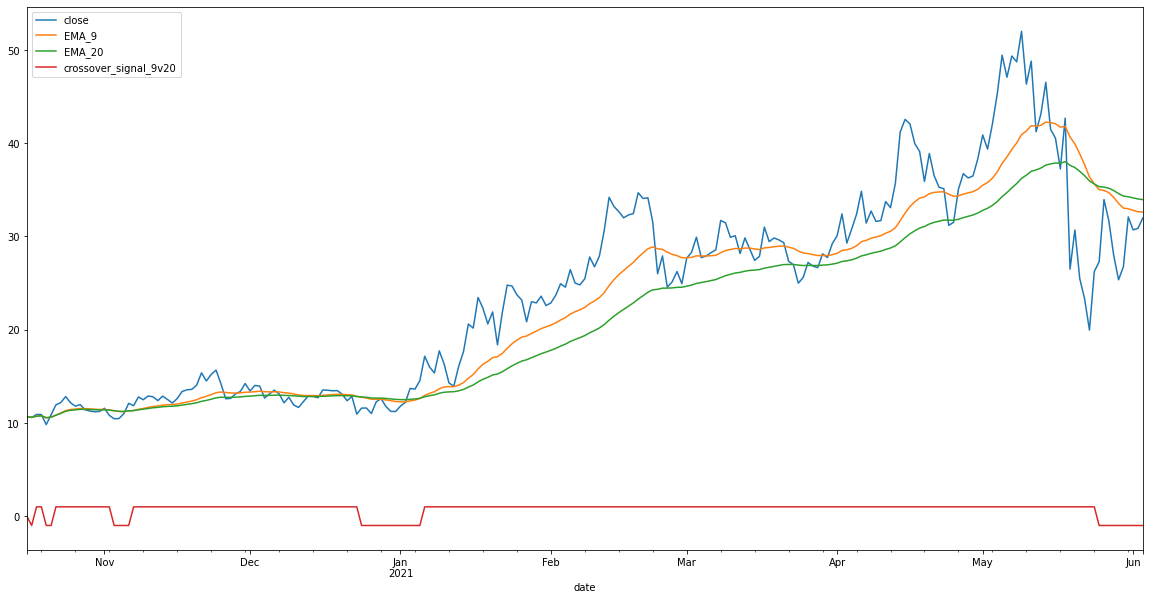

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

In [15]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

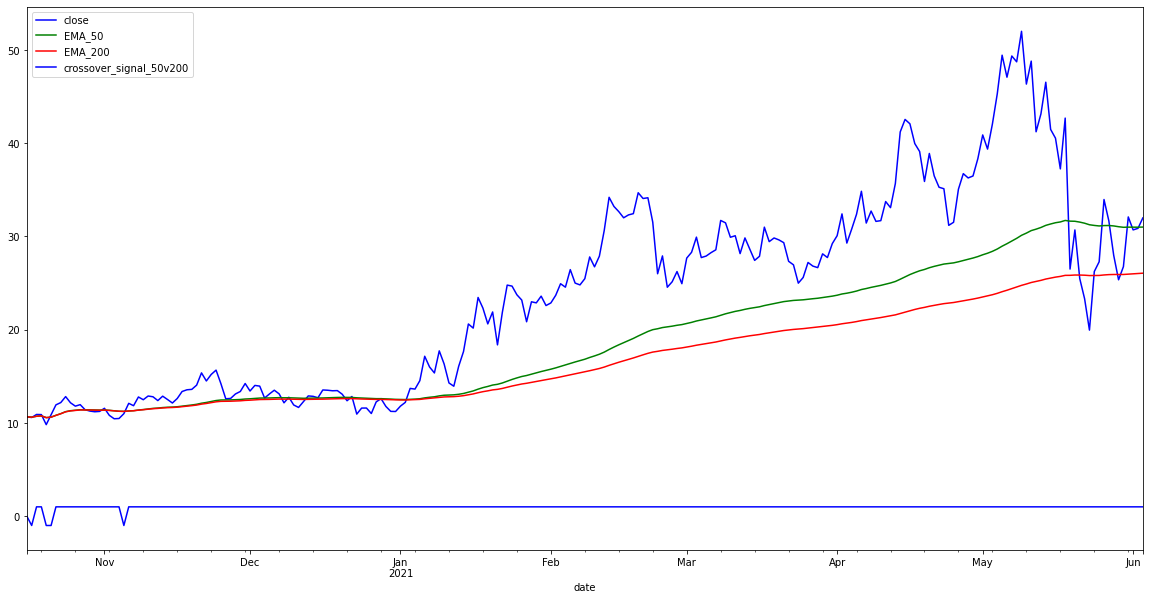

In [20]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

<AxesSubplot:xlabel='date'>

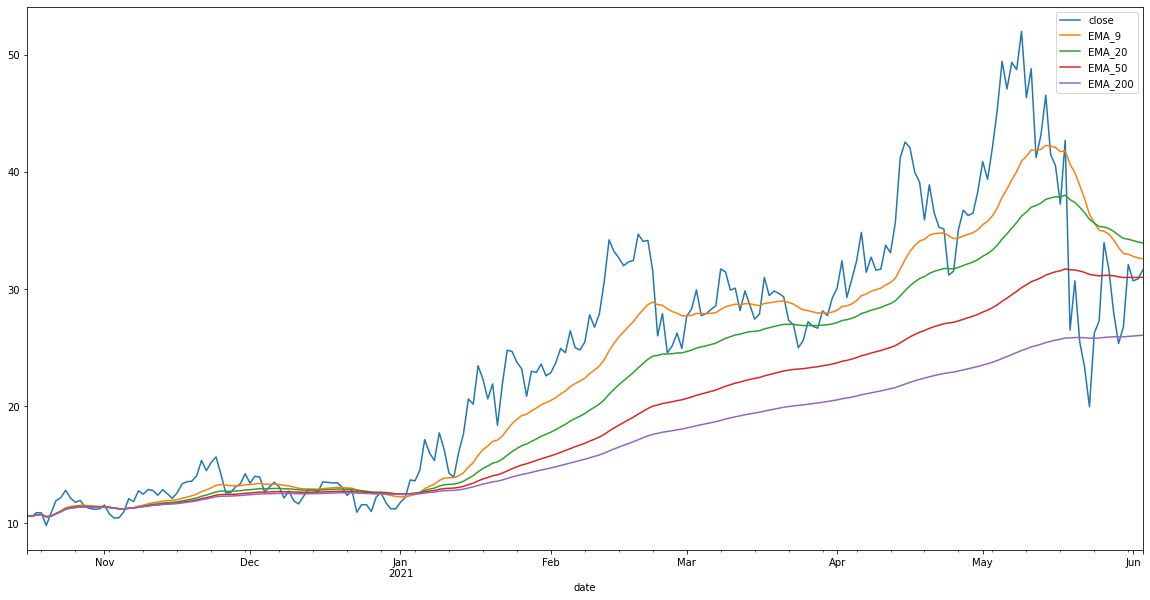

In [17]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [33]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

,timestamp,open,high,low,close,volume,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
50,1607040000000,13.95074,14.02903,12.56584,12.66937,4583.342663,13.712836,0.975798,14.688633,12.737038,1.0,0.0,1.0
51,1607126400000,12.58801,13.69190,12.58801,13.10688,3464.088749,13.761372,0.915526,14.676898,12.845846,0.0,0.0,0.0
52,1607212800000,13.20477,14.00000,12.87182,13.50853,5346.637812,13.805869,0.877915,14.683784,12.927954,0.0,0.0,0.0
53,1607299200000,13.28565,13.28774,12.90000,13.11495,2557.946122,13.793117,0.886391,14.679508,12.906725,0.0,0.0,0.0
54,1607385600000,13.05938,13.16000,11.50000,12.15672,12522.457069,13.723221,0.958379,14.681600,12.764843,1.0,0.0,1.0
55,1607472000000,12.12000,12.79919,11.58395,12.75641,8659.336956,13.681093,0.982347,14.663439,12.698746,0.0,0.0,0.0
56,1607558400000,12.58801,12.60478,11.90000,11.92700,3833.942560,13.574753,1.052488,14.627241,12.522265,1.0,0.0,1.0
57,1607644800000,11.80000,12.12702,11.45223,11.66000,10147.108717,13.389407,1.046653,14.436060,12.342753,1.0,0.0,1.0
58,1607731200000,11.75311,12.37972,11.75311,12.27313,4061.572291,13.278064,1.040722,14.318786,12.237342,0.0,0.0,0.0
59,1607817600000,12.38000,13.25995,12.08893,12.89628,11553.698352,13.162900,0.939409,14.102309,12.223491,0.0,0.0,0.0


### Plot Bollinger Bands

<AxesSubplot:>

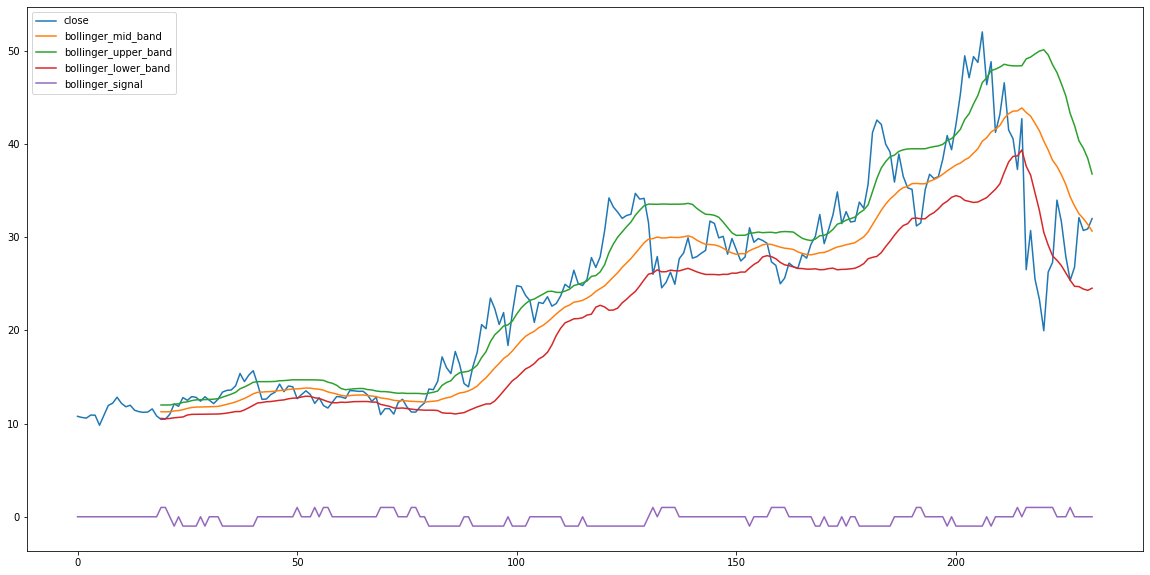

In [34]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [35]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd
historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']


historical_prices_df.head(50)

,timestamp,open,high,low,close,volume,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,...,bollinger_short,bollinger_signal,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal
0,1602720000000,10.70000,10.77000,10.67489,10.77000,152.510069,NaN,NaN,NaN,NaN,...,0.0,0.0,10.770000,10.770000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1602806400000,10.49000,10.88079,10.37794,10.65000,6823.127401,NaN,NaN,NaN,NaN,...,0.0,0.0,10.751538,10.761111,-0.009573,-0.001915,-0.007658,0.0,-1.0,-1.0
2,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,NaN,NaN,NaN,NaN,...,0.0,0.0,10.725482,10.747856,-0.022374,-0.006007,-0.016368,0.0,-1.0,-1.0
3,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,NaN,NaN,NaN,NaN,...,0.0,0.0,10.753465,10.759672,-0.006207,-0.006047,-0.000161,0.0,-1.0,-1.0
4,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,NaN,NaN,NaN,NaN,...,0.0,0.0,10.774915,10.769540,0.005375,-0.003762,0.009137,1.0,0.0,1.0
5,1603152000000,10.84422,10.84422,9.81666,9.81666,8063.562627,NaN,NaN,NaN,NaN,...,0.0,0.0,10.627491,10.698956,-0.071465,-0.017303,-0.054162,0.0,-1.0,-1.0
6,1603238400000,9.84859,11.48999,9.84859,10.87379,7740.875231,NaN,NaN,NaN,NaN,...,0.0,0.0,10.665383,10.711907,-0.046524,-0.023147,-0.023377,0.0,-1.0,-1.0
7,1603324800000,12.10292,12.10292,11.90000,11.93695,640.608459,NaN,NaN,NaN,NaN,...,0.0,0.0,10.861009,10.802651,0.058358,-0.006846,0.065204,1.0,0.0,1.0
8,1603411200000,11.85128,12.22066,11.56388,12.18427,5989.712080,NaN,NaN,NaN,NaN,...,0.0,0.0,11.064587,10.904993,0.159594,0.026442,0.133152,1.0,0.0,1.0
9,1603497600000,12.11199,12.84346,12.11199,12.82296,1488.771994,NaN,NaN,NaN,NaN,...,0.0,0.0,11.335106,11.047065,0.288042,0.078762,0.209280,1.0,0.0,1.0


<AxesSubplot:>

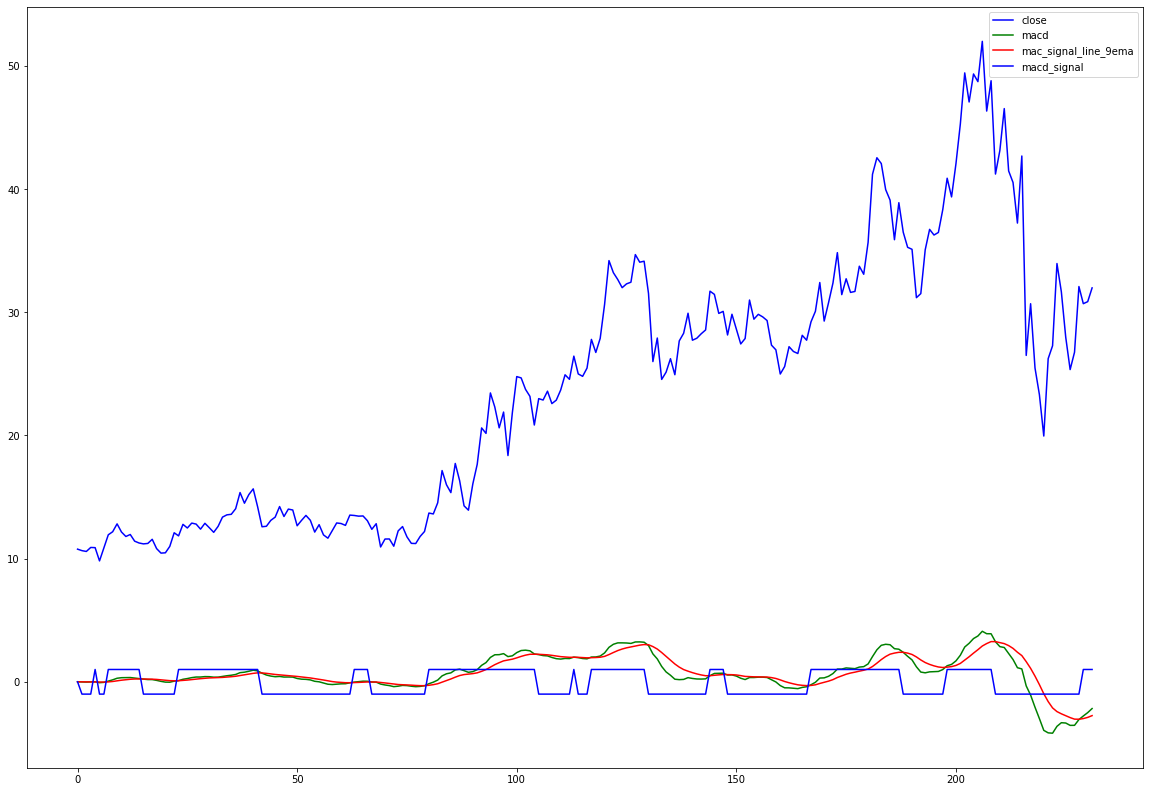

In [38]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

In [39]:
#### SAVE FOR LATER ####
### A conservative, yet effective way to use the macd is to exit your position the second the MACD-SIGNAL value starts to decrease.
###### i.e. if you're in a long position, and the mac

# historical_prices_df['macd_less_signal_slope'] = historical_prices_df.macd_less_signal.diff()
# historical_prices_df.head()

In [41]:
# historical_prices_df[['close','macd','macd_signal']].plot(figsize=(20,10))

# historical_prices_df[['macd_less_signal', 'macd_less_signal_slope', 'mac_signal']].plot(figsize=(20,10))
# plt.axhline(y=0, color='r', linestyle='-')


# SO, A CONSERVATIVE MACD SIGNAL WOULD SAY, CLOSE POSITION WHEN THE ORANGE LINE CROSSES BACK ABOVE THE ZERO LINE. 
# YOU EXIT YOUR POSITIONS EARLY AND OFTEN MISS BIG GAINS, HOWEVER, YOUR LIKELINESS TO TAKE HOME PROFIT IS HIGHER.

### Build RSI Signals

In [42]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.tail()

,timestamp,open,high,low,close,volume,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,...,macd_long,macd_short,macd_signal,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
227,1622332800000,25.18917,29.10571,23.75893,26.76105,48007.786240,33.341955,8.626119,41.968074,24.715836,...,0.0,-1.0,-1.0,1.41009,1.41009,0.00000,1.563832,2.058139,0.759828,43.176267
228,1622419200000,26.78231,32.09140,25.64723,32.09140,60506.920034,32.506366,7.821490,40.327856,24.684875,...,0.0,-1.0,-1.0,5.33035,5.33035,0.00000,1.832869,1.911129,0.959050,48.954857
229,1622505600000,31.91397,32.53629,29.05471,30.70134,41418.194124,31.980149,7.553432,39.533582,24.426717,...,1.0,0.0,1.0,-1.39006,0.00000,1.39006,1.701950,1.873910,0.908235,47.595539
230,1622592000000,30.70134,32.12980,29.73269,30.86564,24321.482985,31.366318,7.082767,38.449085,24.283552,...,1.0,0.0,1.0,0.16430,0.16430,0.00000,1.592118,1.740059,0.914979,47.780104
231,1622678400000,30.59220,31.98190,30.04054,31.98190,4734.267405,30.638366,6.124400,36.762766,24.513966,...,1.0,0.0,1.0,1.11626,1.11626,0.00000,1.558128,1.615769,0.964326,49.091943


In [ ]:
historical_prices_df[['rsi_14']].plot(figsize=(20,10))
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')

# 2. MACHINE LEARNING

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [31]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + RSI + BB <br />
 > Strategy 2 = EMA50v200 + RSI + MACD <br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [37]:
# Set x variable list of features
st1_x_var_list = ['crossover_signal_50v200', 'rsi_signal', 'bollinger_signal']
st2_x_var_list = ['crossover_signal_50v200', 'rsi_signal', 'macd_signal']
st3_x_var_list = ['crossover_signal_50v200', 'crossover_signal_9v20', 'macd_signal']


# Filter by x-variable list
historical_prices_df[x_var_list].head(20)

,crossover_signal_9v20,crossover_signal_50v200,bollinger_signal,macd_signal
date,,,,
2020-10-17,0.0,0.0,0.0,0.0
2020-10-18,-1.0,-1.0,0.0,-1.0
2020-10-19,1.0,1.0,0.0,1.0
2020-10-20,1.0,1.0,0.0,1.0
2020-10-21,-1.0,-1.0,0.0,-1.0
2020-10-22,-1.0,-1.0,0.0,-1.0
2020-10-23,1.0,1.0,0.0,1.0
2020-10-24,1.0,1.0,0.0,1.0
2020-10-25,1.0,1.0,0.0,1.0


### Shift the DataFrame Index by 1

In [34]:
historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
historical_prices_df[x_var_list].tail()

,crossover_signal_9v20,crossover_signal_50v200,bollinger_signal,macd_signal
date,,,,
2021-05-30,-1.0,1.0,1.0,-1.0
2021-05-31,-1.0,1.0,0.0,-1.0
2021-06-01,-1.0,1.0,0.0,-1.0
2021-06-02,-1.0,1.0,0.0,1.0
2021-06-03,-1.0,1.0,0.0,1.0


### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [35]:
# Drop NAs and replace positive/negative infinity values
historical_prices_df.dropna(subset=x_var_list, inplace=True)
historical_prices_df.dropna(subset=['daily_return'], inplace=True)
historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,bollinger_short,bollinger_signal,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal
date,,,,,,,,,,,,,,,,,,,,,
2020-10-17,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17,-0.006369,10.614780,10.615497,...,0.0,0.0,10.639565,10.644976,-0.005411,-0.001082,-0.004329,0.0,-1.0,0.0
2020-10-18,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18,0.030731,10.719910,10.716179,...,0.0,0.0,10.680765,10.664412,0.016353,0.002405,0.013948,1.0,0.0,-1.0
2020-10-19,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19,-0.001328,10.768271,10.762679,...,0.0,0.0,10.713400,10.681336,0.032064,0.008337,0.023727,1.0,0.0,1.0
2020-10-20,1603152000000,10.84422,10.84422,9.81666,9.81666,8063.562627,2020-10-20,-0.098801,10.547566,10.560139,...,0.0,0.0,10.575440,10.617286,-0.041846,-0.001700,-0.040146,0.0,-1.0,1.0
2020-10-21,1603238400000,9.84859,11.48999,9.84859,10.87379,7740.875231,2020-10-21,0.107687,10.612915,10.617046,...,0.0,0.0,10.621340,10.636287,-0.014947,-0.004349,-0.010597,0.0,-1.0,-1.0


### Construct the Dependent Variable

In [36]:
historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,bollinger_signal,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal,Positive Return
date,,,,,,,,,,,,,,,,,,,,,
2020-10-17,1602892800000,10.50000,10.63435,10.44171,10.58217,3157.443525,2020-10-17,-0.006369,10.614780,10.615497,...,0.0,10.639565,10.644976,-0.005411,-0.001082,-0.004329,0.0,-1.0,0.0,0.0
2020-10-18,1602979200000,10.76000,10.90737,10.76000,10.90737,4705.611062,2020-10-18,0.030731,10.719910,10.716179,...,0.0,10.680765,10.664412,0.016353,0.002405,0.013948,1.0,0.0,-1.0,1.0
2020-10-19,1603065600000,10.73549,16.21371,10.73548,10.89289,3365.404948,2020-10-19,-0.001328,10.768271,10.762679,...,0.0,10.713400,10.681336,0.032064,0.008337,0.023727,1.0,0.0,1.0,0.0
2020-10-20,1603152000000,10.84422,10.84422,9.81666,9.81666,8063.562627,2020-10-20,-0.098801,10.547566,10.560139,...,0.0,10.575440,10.617286,-0.041846,-0.001700,-0.040146,0.0,-1.0,1.0,0.0
2020-10-21,1603238400000,9.84859,11.48999,9.84859,10.87379,7740.875231,2020-10-21,0.107687,10.612915,10.617046,...,0.0,10.621340,10.636287,-0.014947,-0.004349,-0.010597,0.0,-1.0,-1.0,1.0


### Assign Training and Testing Windows